# Reinforced learning

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from agents import MountainCarQ

In [3]:
env = gym.make("MountainCarContinuous-v0", render_mode="human")
observation, info = env.reset()

episode_over = False
while not episode_over:
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)
    episode_over = terminated or truncated

env.close()

### Trenowanie agenta

In [4]:
env = gym.make("MountainCarContinuous-v0")
agent = MountainCarQ(env, discount_factor=1.0, position_bins=10, velocity_bins=5, action_bins=10, initial_epsilon=1.0, final_epsilon=0.1, epsilon_decay=0.0001)
agent.train(10000)

100%|██████████| 10000/10000 [23:05<00:00,  7.22it/s] 


### Testy

##### Wizualne sprawdzenie działania agenta

In [5]:
env = gym.make("MountainCarContinuous-v0", render_mode="human")
observation, _ = env.reset()
episode_over = False
while not episode_over:
    action = agent.get_action(observation)
    next_observation, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated
    observation = next_observation

env.close()

##### Wizualizacja nagród


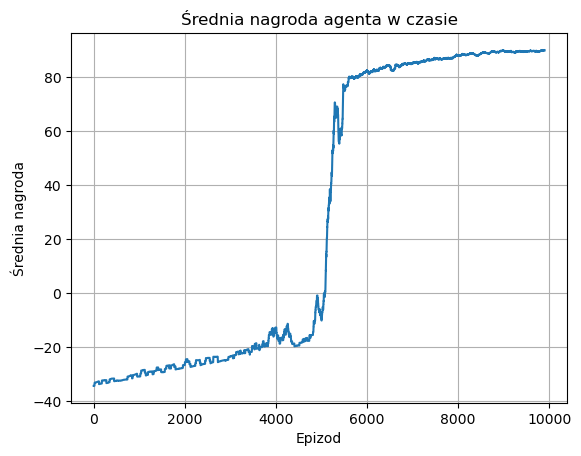

In [6]:
rolling_avg = np.convolve(agent.reward_history, np.ones(100)/100, mode='valid')
plt.plot(rolling_avg)
plt.title("Średnia nagroda agenta w czasie")
plt.xlabel("Epizod")
plt.ylabel("Średnia nagroda")
plt.grid(True)
plt.show()

### Porównanie trzech współczynników dyskontowych

In [7]:
env = gym.make("MountainCarContinuous-v0")
agent2 = MountainCarQ(env, discount_factor=0.7, position_bins=10, velocity_bins=5, action_bins=10, initial_epsilon=1.0, final_epsilon=0.1, epsilon_decay=0.0001)
agent2.train(10000)

100%|██████████| 10000/10000 [32:06<00:00,  5.19it/s]


In [8]:
env = gym.make("MountainCarContinuous-v0", render_mode="human")
observation, _ = env.reset()
episode_over = False
while not episode_over:
    action = agent2.get_action(observation)
    next_observation, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated
    observation = next_observation

env.close()

In [9]:
env = gym.make("MountainCarContinuous-v0")
agent3 = MountainCarQ(env, discount_factor=0.4, position_bins=10, velocity_bins=5, action_bins=10, initial_epsilon=1.0, final_epsilon=0.1, epsilon_decay=0.0001)
agent3.train(10000)

100%|██████████| 10000/10000 [1:08:40<00:00,  2.43it/s]   


In [10]:
env = gym.make("MountainCarContinuous-v0", render_mode="human")
observation, _ = env.reset()
episode_over = False
while not episode_over:
    action = agent3.get_action(observation)
    next_observation, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated
    observation = next_observation

env.close()

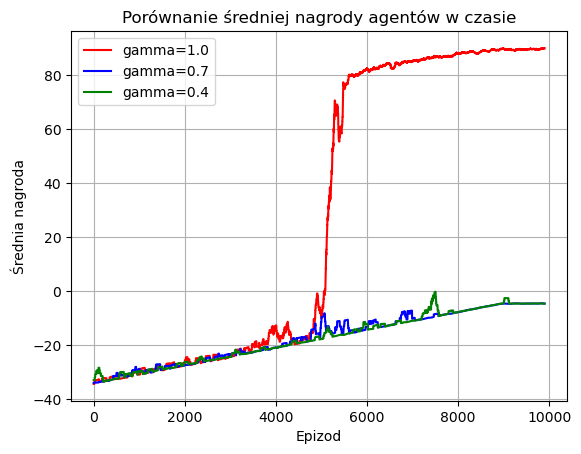

In [11]:
rolling_avg1 = np.convolve(agent.reward_history, np.ones(100)/100, mode='valid')
plt.plot(rolling_avg1, 'r', label='gamma=1.0')

rolling_avg2 = np.convolve(agent2.reward_history, np.ones(100)/100, mode='valid')
plt.plot(rolling_avg2, 'b', label='gamma=0.7')

rolling_avg3 = np.convolve(agent3.reward_history, np.ones(100)/100, mode='valid')
plt.plot(rolling_avg3, 'g', label='gamma=0.4')

plt.title("Porównanie średniej nagrody agentów w czasie")
plt.xlabel("Epizod")
plt.ylabel("Średnia nagroda")
plt.grid(True)
plt.legend()
plt.show()